### TASK 1

In [ ]:
import numpy as np
list = [0,1,2,3,4,5,6,7,8]
array = np.array(list).reshape(3,3)
print(array)

In [ ]:
  calculations = {
  'mean': [array.mean(axis=0).tolist(), array.mean(axis=1).tolist(), array.mean().tolist()],
  'variance': [array.var(axis=0).tolist(), array.var(axis=1).tolist(), array.var().tolist()],
  'standard deviation': [array.std(axis=0).tolist(), array.std(axis=1).tolist(), array.std().tolist()],
  'max': [array.max(axis=0).tolist(), array.max(axis=1).tolist(), array.max().tolist()],
  'min': [array.min(axis=0).tolist(), array.min(axis=1).tolist(), array.min().tolist()],
  'sum': [array.sum(axis=0).tolist(), array.sum(axis=1).tolist(), array.sum().tolist()]
  }
calculations

### TASK 2

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('adult.data.csv')

In [ ]:
df.head(20)

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
print(df['age'].mean())
df['age'].fillna(df['age'].mean())

In [ ]:
df['race'].value_counts()

In [ ]:
df[df['relationship'] == 'Not-in-family'].groupby('sex').age.mean()

In [ ]:
df[df['sex'] == 'Male'].age.mean().round(1)

In [ ]:
df[["sex", "age"]].groupby("sex").mean()

In [ ]:
round((len(df[df['education'] == 'Bachelors'])/len(df)*100),1)

In [ ]:
df[df['education'] == 'Bachelors', 'Masters', 'Doctorate'].age.mean().round(1)

In [ ]:
higher_education = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
higher_education_rich = round(len(higher_education[higher_education['salary'] == '>50K']) / len(higher_education) * 100, 1)
higher_education_rich

In [ ]:
lower_education = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
lower_education_rich = round(len(lower_education[lower_education['salary'] == '>50K']) / len(lower_education) * 100, 1)
lower_education_rich

In [ ]:
min_work_hours = df['hours-per-week'].min()
min_work_hours

In [ ]:
num_min_workers = df[df['hours-per-week'] == min_work_hours]
rich_percentage = round(len(df[(df['hours-per-week'] == min_work_hours) & (df['salary'] == '>50K')]) / len(num_min_workers) * 100, 1)
rich_percentage

In [ ]:
x = round(len(num_min_workers[num_min_workers['salary'] == '>50K']) / len(num_min_workers) * 100, 1)
x

In [ ]:
rich_person = df[df['salary'] == '>50K']
rich_country = rich_person['native-country'].value_counts()
highest_earning_country = rich_country.idxmax()
highest_earning_country

In [ ]:
highest_earning_country_percentage = round(rich_country[highest_earning_country] / rich_country.sum() * 100, 1)
highest_earning_country_percentage

In [ ]:
rich_country.sum()
#rich_country

In [ ]:
rich_country[highest_earning_country]

In [ ]:
rich_person_india = df[(df['salary'] == '>50K') & (df['native-country'] == 'India')]
occupation = rich_person_india['occupation'].value_counts()
occupation

### TASK 3

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('medical_examination.csv')
df.head()

In [ ]:
BMI = df['weight']/((df['height']/100)**2)
BMI

In [ ]:
j=0
for i in BMI:
    if i > 25:
        BMI[j] = 1
    else: 
        BMI[j] = 0
    j+=1
    
BMI.astype(int)
df['overweight'] = BMI.astype(int)
df

In [ ]:
df['cholesterol'] = df['cholesterol'].replace(1, 0)
for i in df['cholesterol']:
    if i > 1:
        df['cholesterol'] = df['cholesterol'].replace(i, 1)
df['gluc'] = df['gluc'].replace(1, 0)
for i in df['gluc']:
    if i > 1:
        df['gluc'] = df['gluc'].replace(i, 1)
df

In [ ]:
df_cat = df.loc[:, 'cholesterol':'overweight'].melt('cardio')
df_cat = df_cat.groupby(['cardio','variable','value']).size().rename('total').reset_index()
df_cat

In [ ]:
fig_1 = sns.catplot(x="variable",
                y="total",
                hue="value",
                col="cardio",
                kind="bar",
                ci = None,
                data=df_cat)
fig_1.savefig('catplot.png')

In [ ]:
clear_df=df[~((df['ap_lo']>df['ap_hi']) | (df['height']<df['height'].quantile(0.025)) | (df['height']>df['height'].quantile(0.975))
          | (df['weight']<df['weight'].quantile(0.025)) | (df['weight']>df['weight'].quantile(0.975)))]
clear_df

In [ ]:
df_heat=df[(df['ap_lo']<=df['ap_hi'])]
df_heat=df_heat[df_heat['height']>=df_heat['height'].quantile(0.025)]
df_heat=df_heat[df_heat['height']<=df_heat['height'].quantile(0.975)]
df_heat=df_heat[df_heat['weight']>=df_heat['weight'].quantile(0.025)]
df_heat=df_heat[df_heat['weight']<=df_heat['weight'].quantile(0.975)]
df_heat

In [ ]:
corr = clear_df.corr()

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style('white'):
    ax = sns.heatmap(corr.round(1), linewidths=.4, mask=mask, annot=True, annot_kws={"size": 8}, fmt=".1f", cbar_kws={"shrink": .50})
    
fig.savefig('heatmap.png')

### TASK 4

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import calendar

In [ ]:
df = pd.read_csv('fcc-forum-pageviews.csv').set_index('date')
df

In [ ]:
df = df[~((df['value']<=df['value'].quantile(0.025)) | (df['value']>=df['value'].quantile(0.975)))]

In [ ]:
fig = df.plot(figsize=(20, 6.5), color='red').figure
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()
#fig = plot.get_figure()
fig.savefig('line_plot.png')

In [ ]:
df_bar = df.copy()
df_bar['Year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['Month'] = pd.DatetimeIndex(df_bar.index).month

In [ ]:
df_bar = df_bar.groupby(['Year', 'Month'])['value'].mean()
df_bar = df_bar.unstack()
df_bar

In [ ]:
month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']

In [ ]:
fig = df_bar.plot(kind= 'bar', figsize = (11,10)).figure

plt.title('')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
lg = plt.legend(title= 'Months', fontsize = 15, labels = month_names)
title = lg.get_title()
title.set_fontsize(10)

fig.savefig('bar_plot.png')

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Year'] = pd.DatetimeIndex(df_box["date"]).year
df_box['Month'] = pd.DatetimeIndex(df_box["date"]).month

#df_box['Month'] = df_box['Month'].apply(lambda x: calendar.month_abbr[x])
df_box

In [ ]:
sort_order = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Year'] = pd.DatetimeIndex(df_box["date"]).year
df_box['Month'] = pd.DatetimeIndex(df_box["date"]).month
df_box['Month'] = df_box['Month'].apply(lambda x: calendar.month_abbr[x])
df_box.index = pd.CategoricalIndex(df_box['Month'], categories=sort_order, ordered=True)
df_box = df_box.sort_index().reset_index(drop=True)
df_box

In [ ]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['Year'] = pd.DatetimeIndex(df_box["date"]).year
    df_box['Month'] = pd.DatetimeIndex(df_box["date"]).month
    
    # Draw box plots (using Seaborn)
    fig = sns.boxplot(x = "Year", y = "value", data = df_box)
    plt.title("Year-wise Box Plot (Trend)")
    plt.xlabel('Year')
    plt.ylabel('Page Views')
    plt.ylim(20000, 200000)
    plt.show()
    
    sort_order = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    df_box['Month'] = df_box['Month'].apply(lambda x: calendar.month_abbr[x])
    df_box.index = pd.CategoricalIndex(df_box['Month'], categories=sort_order, ordered=True)
    df_box = df_box.sort_index().reset_index(drop=True)
    fig2 = sns.boxplot(x='Month', y='value', data=df_box)
    plt.title("Month-wise Box Plot (Seasonality)")
    plt.xlabel('Month')
    plt.ylabel('Page Views')
    plt.ylim(20000, 200000)
    plt.show()

    fig = fig.get_figure()
    fig2 = fig2.get_figure()
    fig.savefig('box_plot.png')
    fig2.savefig('box_plot2.png')
    
    # Save image and return fig (don't change this part)
    return fig,fig2

draw_box_plot()

### TASK 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [37]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


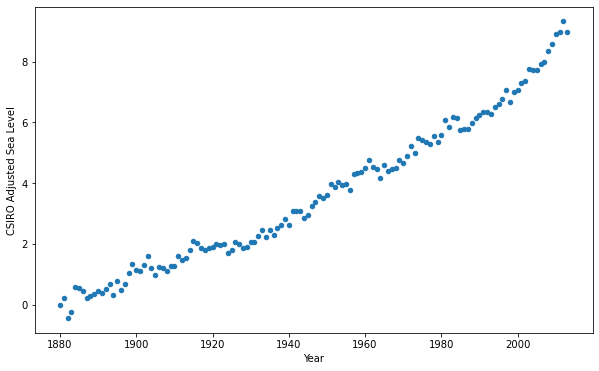

In [38]:
df.plot(kind= 'scatter', x = 'Year', y = 'CSIRO Adjusted Sea Level', figsize = (10, 6))

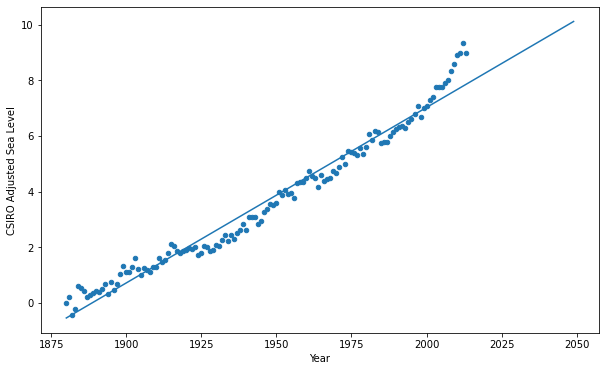

In [39]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
df.plot(kind= 'scatter', x = 'Year', y = 'CSIRO Adjusted Sea Level', figsize = (10, 6))
range_x = np.arange(x.min(), 2050)
plt.plot(range_x, intercept + slope*range_x, label='Best Fit Line 1: $%.2fx + %.2f$' % (slope, intercept))

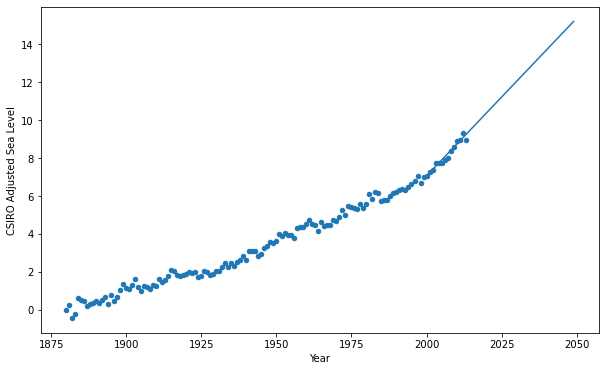

In [40]:
x2 = df[ df['Year'] >= 2000 ]['Year']
y2 = df[ df['Year'] >= 2000 ]['CSIRO Adjusted Sea Level']
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2, y2)
df.plot(kind= 'scatter', x = 'Year', y = 'CSIRO Adjusted Sea Level', figsize = (10, 6))
range_x2 = np.arange(x2.min(), 2050)
plt.plot(range_x2, intercept2 + slope2*range_x2, label= 'Best Fit Line 2: $%.2fx + %.2f$' % (slope2, intercept2))

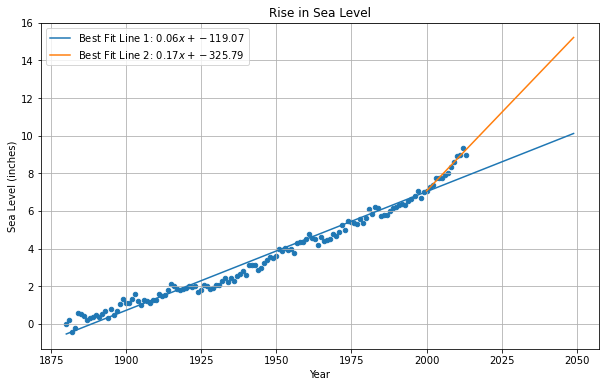

In [42]:
df.plot(kind= 'scatter', x = 'Year', y = 'CSIRO Adjusted Sea Level', figsize = (10, 6))

x = df['Year']
y = df['CSIRO Adjusted Sea Level']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
range_x = np.arange(x.min(), 2050)
plt.plot(range_x, intercept + slope*range_x, label='Best Fit Line 1: $%.2fx + %.2f$' % (slope, intercept))

x2 = df[ df['Year'] >= 2000 ]['Year']
y2 = df[ df['Year'] >= 2000 ]['CSIRO Adjusted Sea Level']
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2, y2)
range_x2 = np.arange(x2.min(), 2050)
plt.plot(range_x2, intercept2 + slope2*range_x2, label= 'Best Fit Line 2: $%.2fx + %.2f$' % (slope2, intercept2))

plt.legend(loc = 'best')
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.grid()
plt.show()